In [1]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_May__3_18:49:52_PDT_2022
Cuda compilation tools, release 11.7, V11.7.64
Build cuda_11.7.r11.7/compiler.31294372_0


/home/djjin/anaconda3/envs/conda_visual_HPE/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch:  1.13 ; cuda:  cu117
detectron2: 0.6


In [2]:
from detectron2.utils.logger import setup_logger
setup_logger()

import os, sys
home_dir = os.path.abspath(os.getcwd()+"/../")
sys.path.append(home_dir)
home_dir = os.path.abspath(os.getcwd())
sys.path.append(home_dir)
print(home_dir)

from utils.arguments import load_vcoco_opt_command
from utils.distributed import init_distributed
from datasets.build import build_eval_dataloader

/home/djjin/Mygit/X-Decoder/notebooks


Invalid MIT-MAGIC-COOKIE-1 keyWARNING: Cannot find VLPreDataset. Make sure datasets are accessible if you want to use them for training or evaluation.


datasets/ADE20K_2021_17_01/images_detectron2/training
datasets/ADE20K_2021_17_01/images_detectron2/validation


In [3]:
opt, cmdline_args = load_vcoco_opt_command(home_dir)
opt = init_distributed(opt)

In [4]:
from datasets.registration.register_vcoco_dataset import register_all_vcoco
_root = os.getenv("DATASET", "../datasets")
register_all_vcoco(_root)

In [5]:
def get_config_from_name(cfg, dataset_name):
    # adjust config according to dataset
    if 'refcoco' in dataset_name:
        cfg.update(cfg['REF'])
        return cfg
    elif 'vcoco' in dataset_name:
        cfg.update(cfg['VCOCO'])
        return cfg
    elif 'coco' in dataset_name:
        if 'COCO' in cfg.keys():
            cfg.update(cfg['COCO'])
        return cfg
    elif 'ade' in dataset_name:
        if 'ADE20K' in cfg.keys():
            cfg.update(cfg['ADE20K'])
        return cfg
    elif 'imagenet' in dataset_name:
        if 'IMAGENET' in cfg.keys():
            cfg.update(cfg['IMAGENET'])
        return cfg
    elif 'vlp' in dataset_name:
        cfg.update(cfg['VLP'])
        return cfg
    elif 'sun' in dataset_name:
        cfg.update(cfg['SUN'])
        return cfg
    elif 'scan' in dataset_name:
        cfg.update(cfg['SCAN'])
        return cfg
    elif 'cityscape' in dataset_name:
        cfg.update(cfg['CITY'])
        return cfg
    elif 'bdd' in dataset_name:
        cfg.update(cfg['BDD'])
        return cfg
    else:
        assert False, "dataset not support."

In [6]:
from datasets.dataset_mappers import VCOCODatasetMapper
from datasets.build import build_detection_train_loader
from datasets.build import _train_loader_from_config
from xdecoder.utils import configurable
from detectron2.data.common import DatasetFromList, MapDataset
from detectron2.data.samplers import InferenceSampler, TrainingSampler
from detectron2.data.build import build_batch_data_loader
from datasets.build import build_hoi_test_loader

In [7]:
@configurable(from_config=_train_loader_from_config)
def build_hoi_train_loader(
    dataset, *, mapper, sampler=None, total_batch_size, aspect_ratio_grouping=True, num_workers=0
):
    if isinstance(dataset, list):
        dataset = DatasetFromList(dataset, copy=False)
    if mapper is not None:
        dataset = MapDataset(dataset, mapper)
    if sampler is None:
        sampler = TrainingSampler(len(dataset))
    assert isinstance(sampler, torch.utils.data.sampler.Sampler)
    return build_batch_data_loader(
        dataset,
        sampler,
        total_batch_size,
        aspect_ratio_grouping=aspect_ratio_grouping,
        num_workers=num_workers,
    )

In [10]:
opt['DATASETS']['Train'] = ['vcoco_train']
dataset_names = opt['DATASETS']['Train']
opt.update(opt['VCOCO'])
mapper = VCOCODatasetMapper(opt, True)
dataloaders = [build_hoi_train_loader(opt, dataset_names, mapper=mapper)]
dataloaders

[07/12 16:57:39 d2.data.common]: Serializing 5400 elements to byte tensors and concatenating them all ...
[07/12 16:57:39 d2.data.common]: Serialized dataset takes 3.62 MiB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


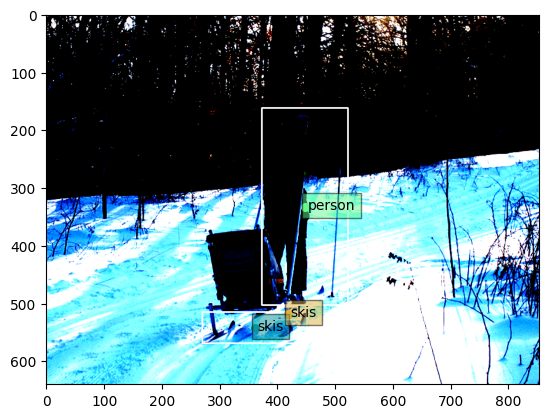

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


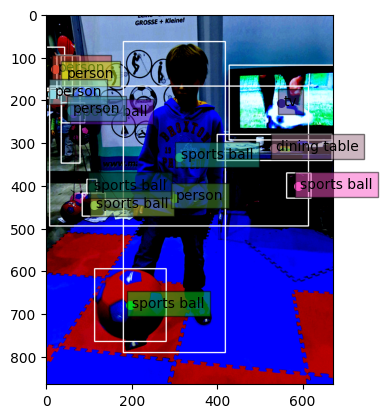

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


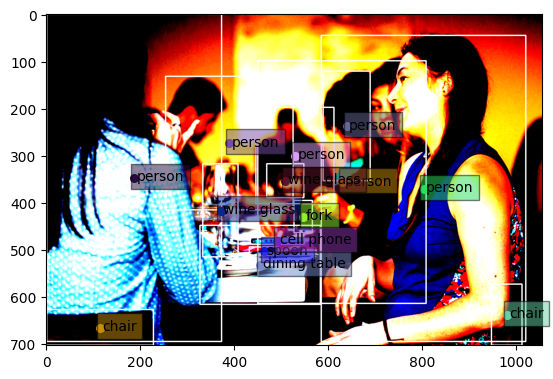

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


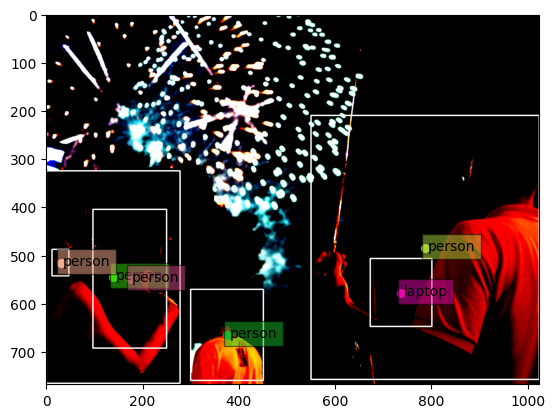

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


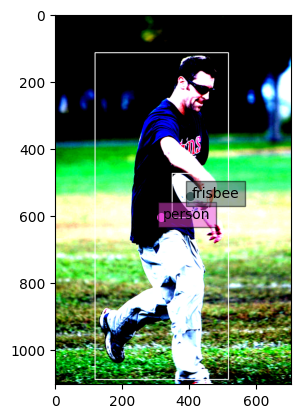

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


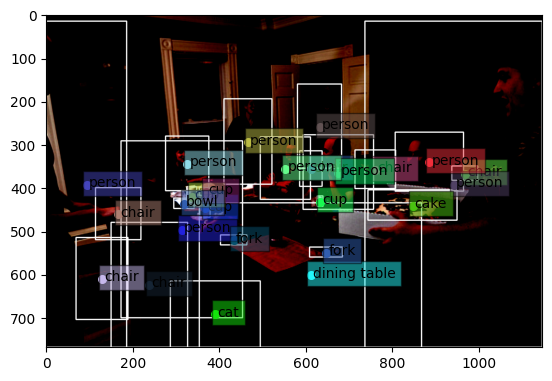

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


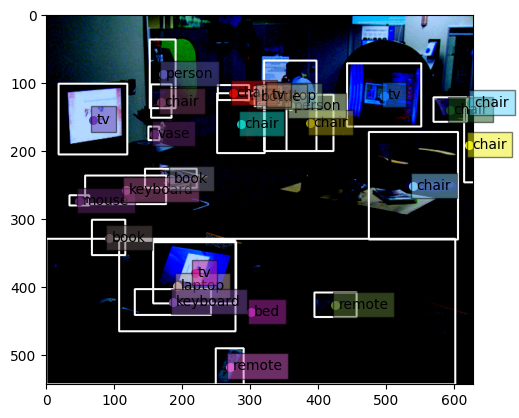

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


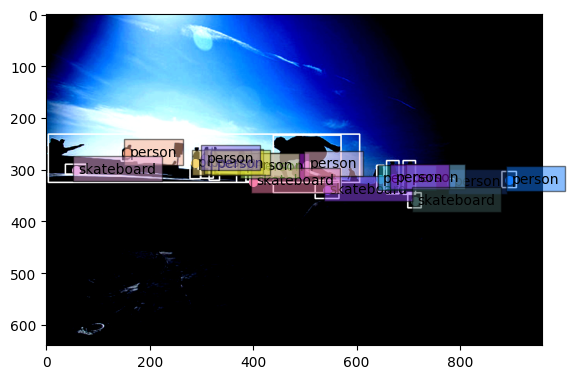

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


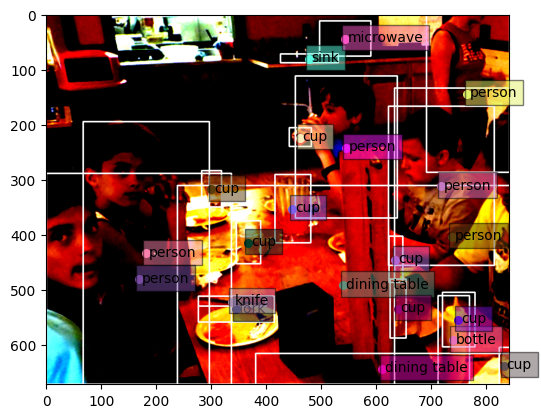

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


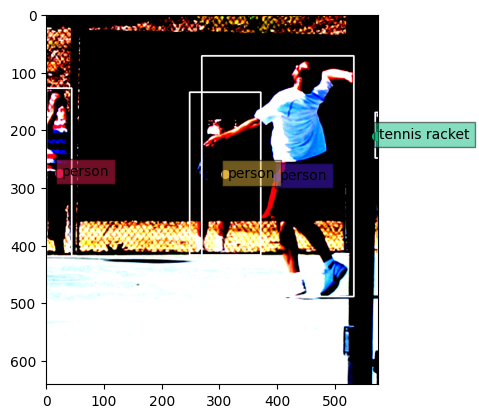

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


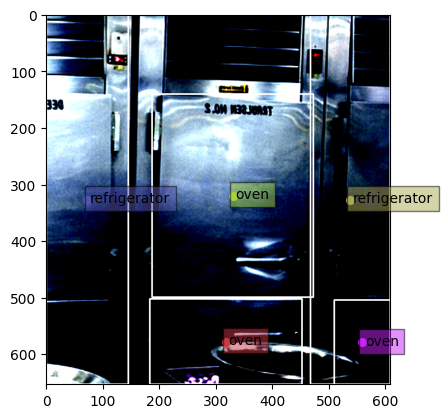

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


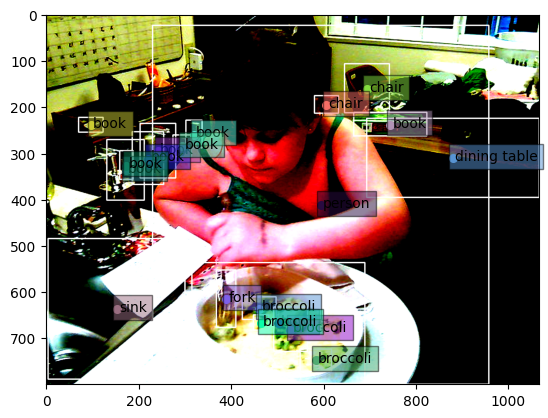

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


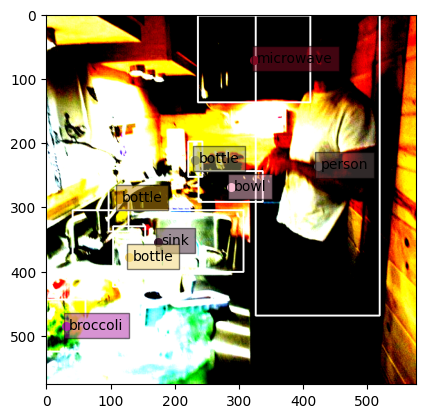

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


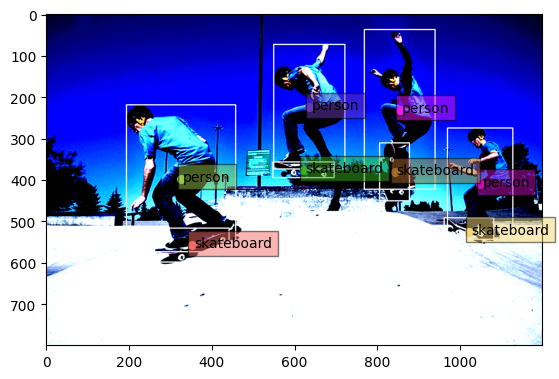

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


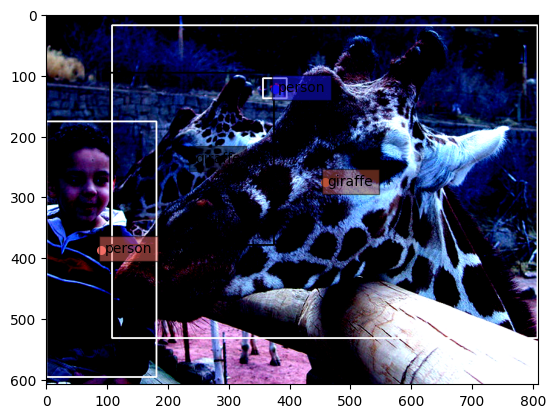

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


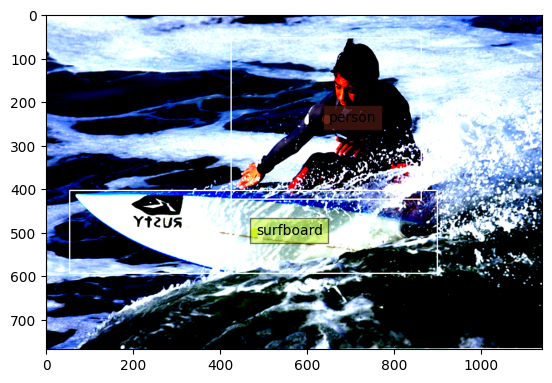

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


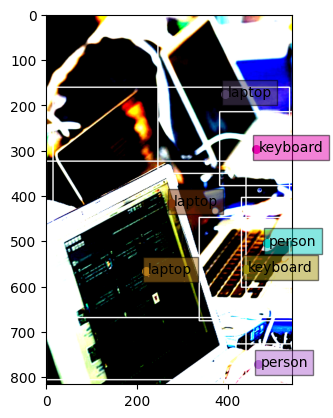

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


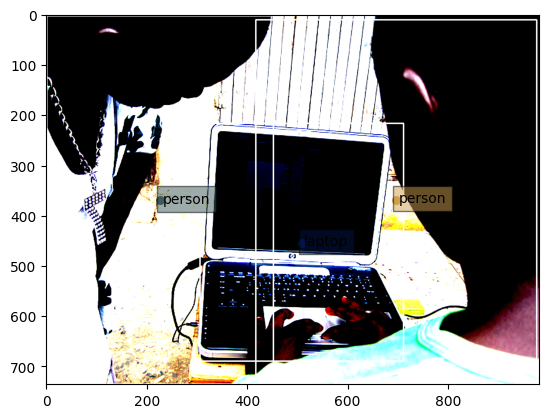

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


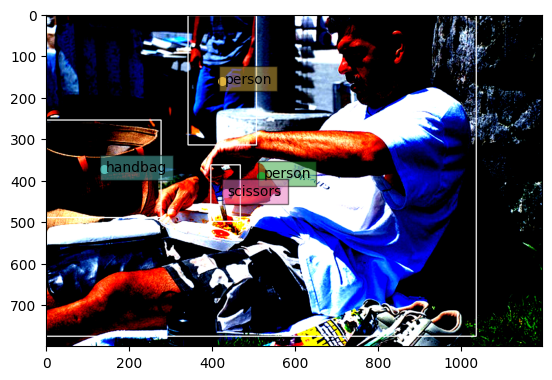

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


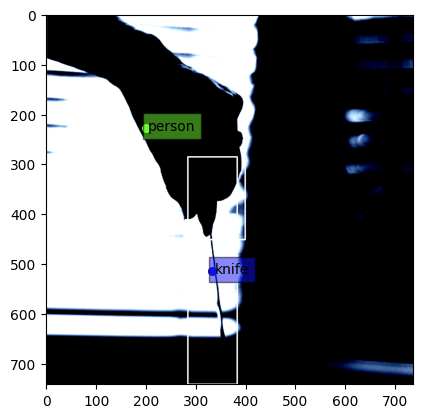

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


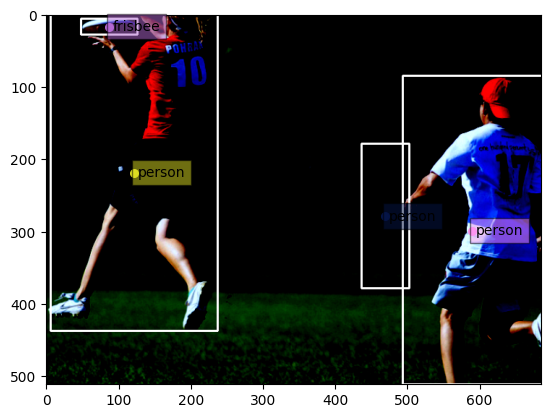

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


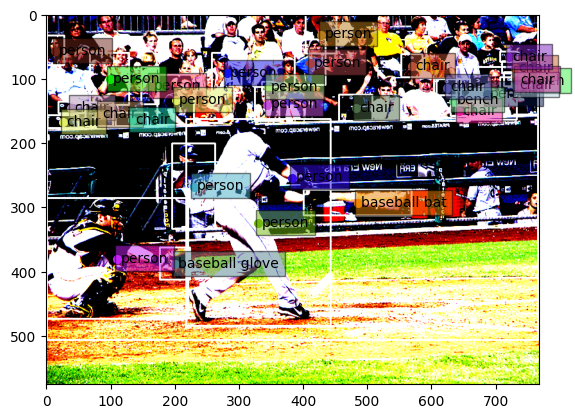

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


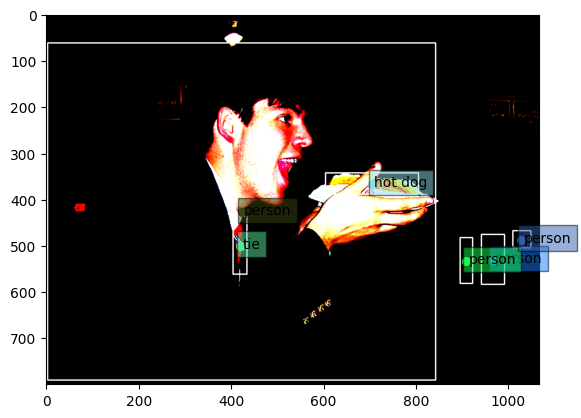

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


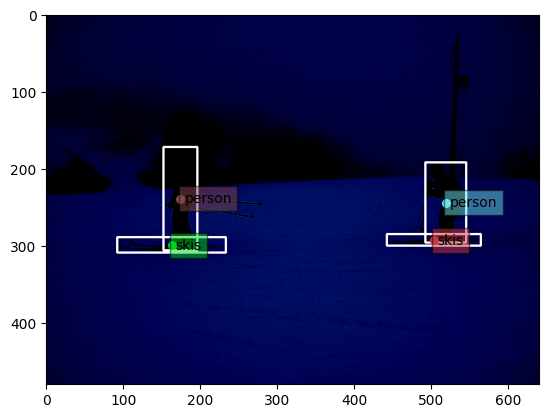

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


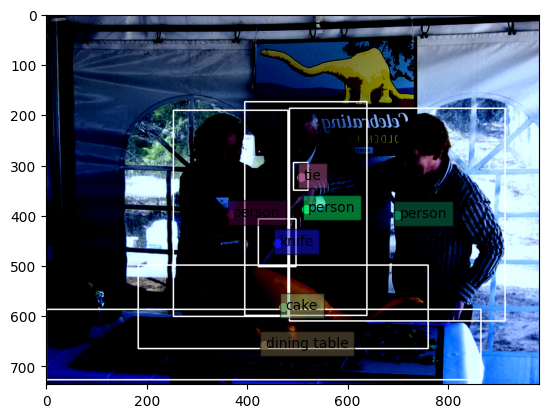

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


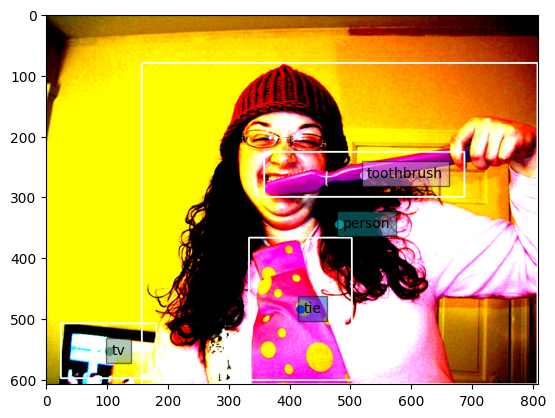

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


KeyboardInterrupt: 

In [15]:
import cv2, random
from datasets.utils.vcoco_utils import valid_obj_ids, get_coco_instance_ID_to_name
from matplotlib import pyplot as plt
def random_color():
    rdn = random.randint(1, 1000)
    b = int(rdn * 997) % 255
    g = int(rdn * 4447) % 255
    r = int(rdn * 6563) % 255
    return b, g, r

for dataloader, dataset_name in zip(dataloaders, dataset_names):
    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            for test in batch:
                target_img = test["image"]
                target = test["instances"]
                img = target_img.permute(1, 2, 0).detach().cpu().numpy()
                hh, ww = img.shape[0], img.shape[1]
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

                obj_labels = []
                labels = []
                verb_names = []
                ob_boxes = []
                sub_boxes = []

                obj_boxes = target['boxes']
                for test in range(obj_boxes.shape[0]):
                    cx, cy, w, h = obj_boxes[test]
                    color = random_color()
                    cx, cy, w, h = cx * ww, cy * hh, w * ww, h * hh
                    n_box = list(map(int, [cx - 0.5 * w, cy - 0.5 * h, cx + 0.5 * w, cy + 0.5 * h]))
                    x1, y1, x2, y2 = n_box
                    ob_boxes.append(n_box)

                for idx in target['labels']:
                    label_name = get_coco_instance_ID_to_name(valid_obj_ids[idx])
                    labels.append(label_name)

                for label, box in zip(labels, ob_boxes):
                    color = random_color()
                    x1, y1, x2, y2 = box
                    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

                    x = (x1 + x2) / 2
                    y = (y1 + y2) / 2

                    plt.scatter(x, y, 30, color=[i/255 for i in color])
                    plt.text(
                        x + 5,
                        y + 5,
                        label,
                        fontsize=10,
                        bbox=dict(facecolor=[i/255 for i in color], alpha=0.5),
                        )

                plt.imshow(img)
                plt.show()

In [ ]:
dataloaders = build_train_dataloader(opt)
# dataset_names = opt['DATASETS']['TEST']
# dataloaders

vcoco_train


TypeError: build_hoi_test_loader() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:
for dataloader, dataset_name in zip(dataloaders, dataset_names):
    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            for test in batch:
                target_img = test["image"]
                target = test["instances"]